In [1]:
# Imports the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 
from pathlib import Path

current_dir = Path().resolve()
dir_csv = current_dir.parent / "Data" / "owid-covid-latest.csv"  # Si el notebook está en notebooks/


# Load the data
df = pd.read_csv(dir_csv)


In [2]:
df.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2024-08-04,235214.0,0.0,0.000,7998.0,0.0,0.0,...,NaN,37.746,0.50,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2024-08-04,13145380.0,36.0,5.143,259117.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2024-08-04,335047.0,0.0,0.000,3605.0,0.0,0.0,...,51.2,NaN,2.89,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2024-08-04,272139.0,18.0,2.571,6881.0,0.0,0.0,...,30.4,83.741,1.90,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,ASM,Oceania,American Samoa,2024-08-04,8359.0,0.0,0.000,34.0,0.0,0.0,...,NaN,NaN,NaN,73.74,NaN,4.429500e+04,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [4]:
# Exploring the data
print(df.head())
print(df.info())
print(df.describe())



   iso_code continent        location last_updated_date  total_cases  \
0       AFG      Asia     Afghanistan        2024-08-04     235214.0   
1  OWID_AFR       NaN          Africa        2024-08-04   13145380.0   
2       ALB    Europe         Albania        2024-08-04     335047.0   
3       DZA    Africa         Algeria        2024-08-04     272139.0   
4       ASM   Oceania  American Samoa        2024-08-04       8359.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0        0.0               0.000        7998.0         0.0   
1       36.0               5.143      259117.0         0.0   
2        0.0               0.000        3605.0         0.0   
3       18.0               2.571        6881.0         0.0   
4        0.0               0.000          34.0         0.0   

   new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
0                  0.0  ...           NaN                  37.746   
1                  0.0  ...           NaN               

In [18]:
# cleaning data

null_percentage = df.isnull().mean() * 100
print(null_percentage.sort_values(ascending=False))

# drop rows with null values
df_clean = df.dropna(axis=1, thresh=2)

new_tests_smoothed          100.000000
new_tests_per_thousand      100.000000
reproduction_rate           100.000000
total_tests_per_thousand    100.000000
total_tests                 100.000000
                               ...    
total_cases_per_million       0.404858
location                      0.000000
iso_code                      0.000000
last_updated_date             0.000000
population                    0.000000
Length: 67, dtype: float64


In [6]:
df_clean['last_updated_date'] = pd.to_datetime(df_clean['last_updated_date'])


/tmp/ipykernel_25210/2734753237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['last_updated_date'] = pd.to_datetime(df_clean['last_updated_date'])


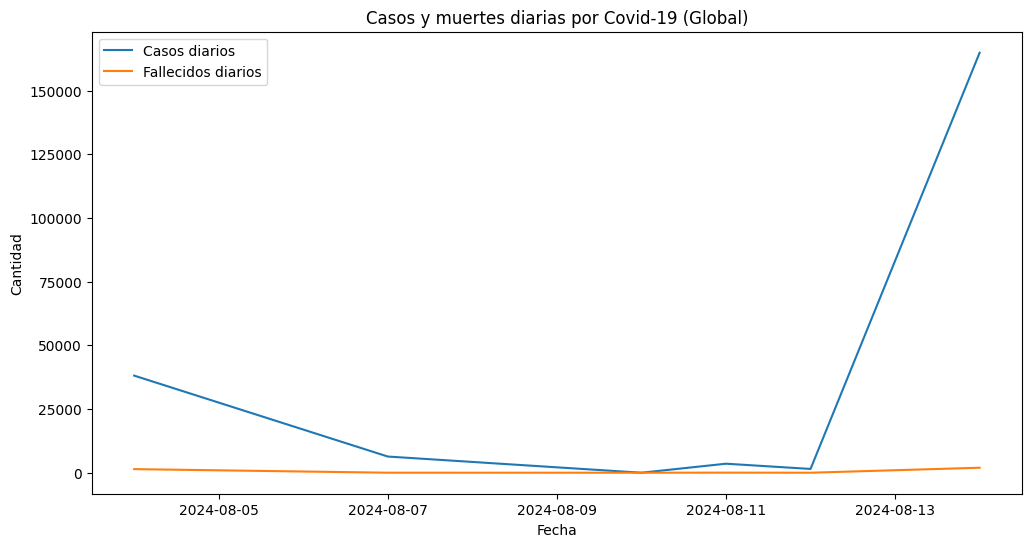

In [7]:
df_global = df_clean.groupby('last_updated_date').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    
}).reset_index()

# plot 

plt.figure(figsize=(12,6))
plt.plot(df_global['last_updated_date'], df_global['new_cases'], label='Casos diarios')
plt.plot(df_global['last_updated_date'], df_global['new_deaths'], label='Fallecidos diarios')
plt.title('Casos y muertes diarias por Covid-19 (Global)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()



/tmp/ipykernel_25210/3187643993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='viridis')
/tmp/ipykernel_25210/3187643993.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


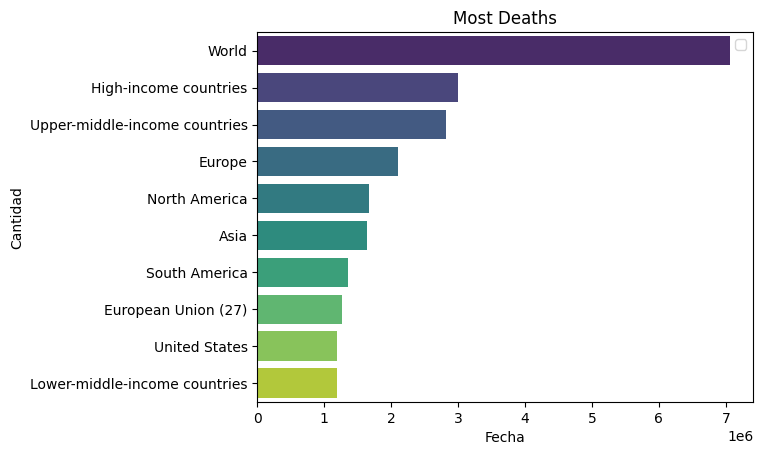

In [35]:
# country-covid-19-data with most deaths

top_deaths = df_clean.groupby('location')['total_deaths'].max().nlargest(10)
sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='viridis')
plt.title('Most Deaths')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(loc='upper right')
plt.show()

In [24]:
nan_percent = df_clean['people_fully_vaccinated_per_hundred'].isna().mean() * 100
print(f"Valores NaN: {nan_percent:.2f}%")


Valores NaN: 93.93%


In [25]:
paises_sin_datos = df_clean[df_clean['people_fully_vaccinated_per_hundred'].isna()]['location'].unique()
print("Países sin datos:", paises_sin_datos)

Países sin datos: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany

In [26]:
df_clean['people_fully_vaccinated_per_hundred'] = df_clean['people_fully_vaccinated_per_hundred'].fillna(0)

/tmp/ipykernel_25210/308669603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['people_fully_vaccinated_per_hundred'] = df_clean['people_fully_vaccinated_per_hundred'].fillna(0)


Text(0.5, 1.0, 'Vacunación vs Mortalidad (NaN rellenados con 0)')

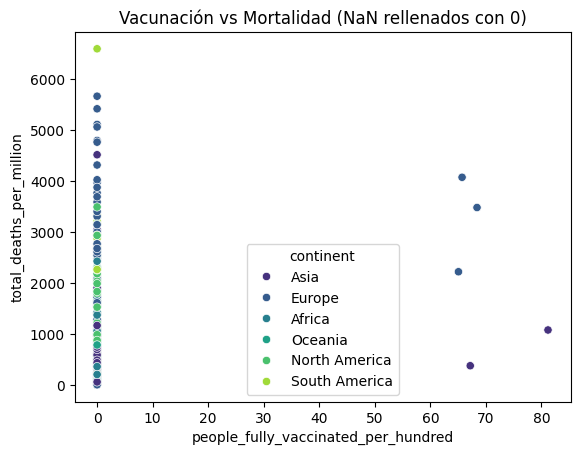

In [31]:
df_last_month = df_clean[df_clean['last_updated_date'] >= '2023-01-01'].copy()
df_last_month['people_fully_vaccinated_per_hundred'] = df_last_month['people_fully_vaccinated_per_hundred'].fillna(0)

# Graficar
sns.scatterplot(
    data=df_last_month,
    x='people_fully_vaccinated_per_hundred',
    y='total_deaths_per_million',
    hue='continent',
    palette='viridis'
)
plt.title("Vacunación vs Mortalidad (NaN rellenados con 0)")

/tmp/ipykernel_25210/3731515350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = pd.to_datetime(df_clean['last_updated_date'])


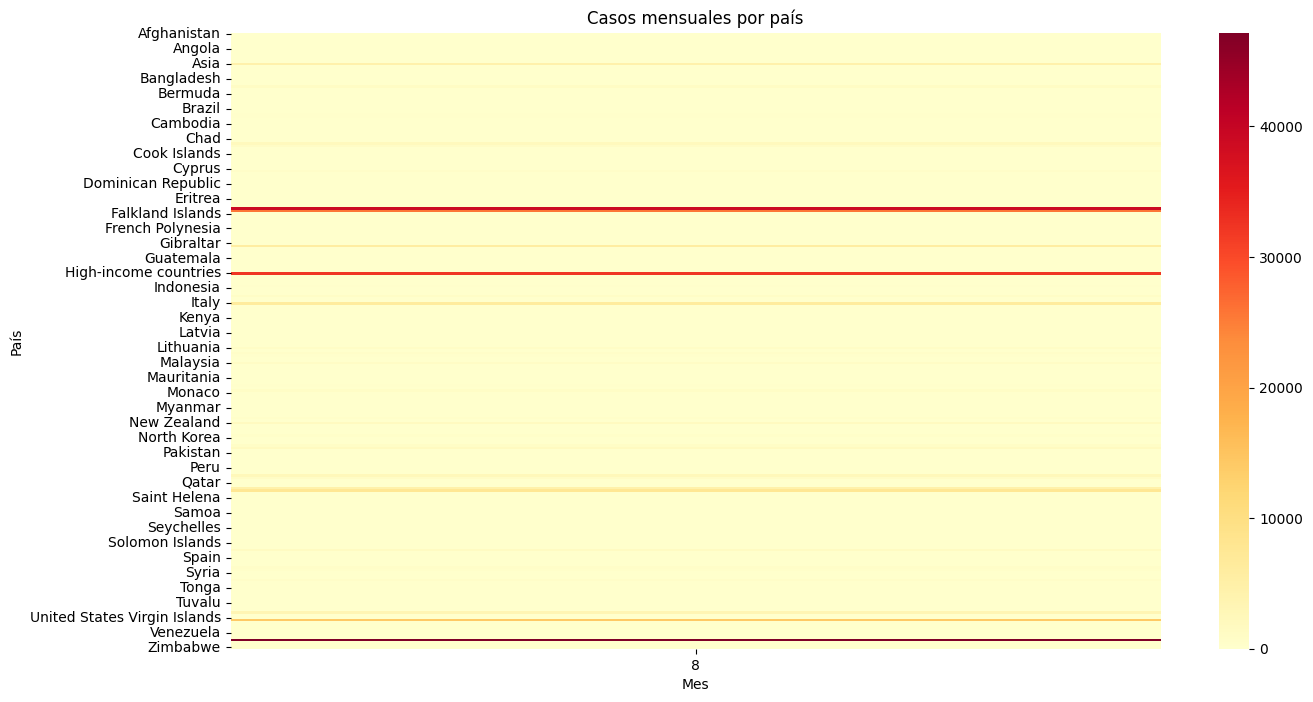

In [37]:

df_clean['date'] = pd.to_datetime(df_clean['last_updated_date'])

# Crear tabla pivote
pivot = df_clean.pivot_table(
    index='location',
    columns=df_clean['date'].dt.month, 
    values='new_cases',
    aggfunc='sum'
)

# Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Casos mensuales por país')
plt.xlabel('Mes')
plt.ylabel('País')
plt.show()